In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/My Drive/awfbdata.csv')

Mounted at /content/gdrive


In [2]:
# For a quick preview of the dataset.
print(data.head())

   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   


In [3]:
#filtering out the apple watch data from the data set
data = data[data['device'] != 'fitbit']
print("data set length:", len(data))
print("Data Set shape:", data.shape)


data set length: 3656
Data Set shape: (3656, 20)


In [4]:
#Factorizing categorical 'activity' data into unique numerical identifiers for machine learning readiness
data['activity_encoded'], unique_activities = pd.factorize(data['activity'])
activity_mapping = dict(zip(unique_activities, range(len(unique_activities))))
print("Activity to Number Mapping:", activity_mapping)


Activity to Number Mapping: {'Lying': 0, 'Sitting': 1, 'Self Pace walk': 2, 'Running 3 METs': 3, 'Running 5 METs': 4, 'Running 7 METs': 5}


In [5]:
#dropping unwanted columns
data = data.drop(['Unnamed: 0', 'X1', 'activity'], axis=1)


In [6]:
#quick previw of the modified data set
print(data.head())

   age  gender  height  weight      steps  hear_rate   calories  distance  \
0   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
1   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
2   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
3   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
4   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  entropy_setps  resting_heart  corr_heart_steps  norm_heart  \
0       6.221612       6.116349           59.0          1.000000   19.531302   
1       6.221612       6.116349           59.0          1.000000   19.453390   
2       6.221612       6.116349           59.0          1.000000   19.540825   
3       6.221612       6.116349           59.0          1.000000   19.628260   
4       6.221612       6.116349           59.0          0.982816   19.715695   

   intensity_karvonen  sd_norm_heart  steps_times_distan

In [7]:
#CHECKING FOR Missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)

age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity_encoded        0
dtype: int64


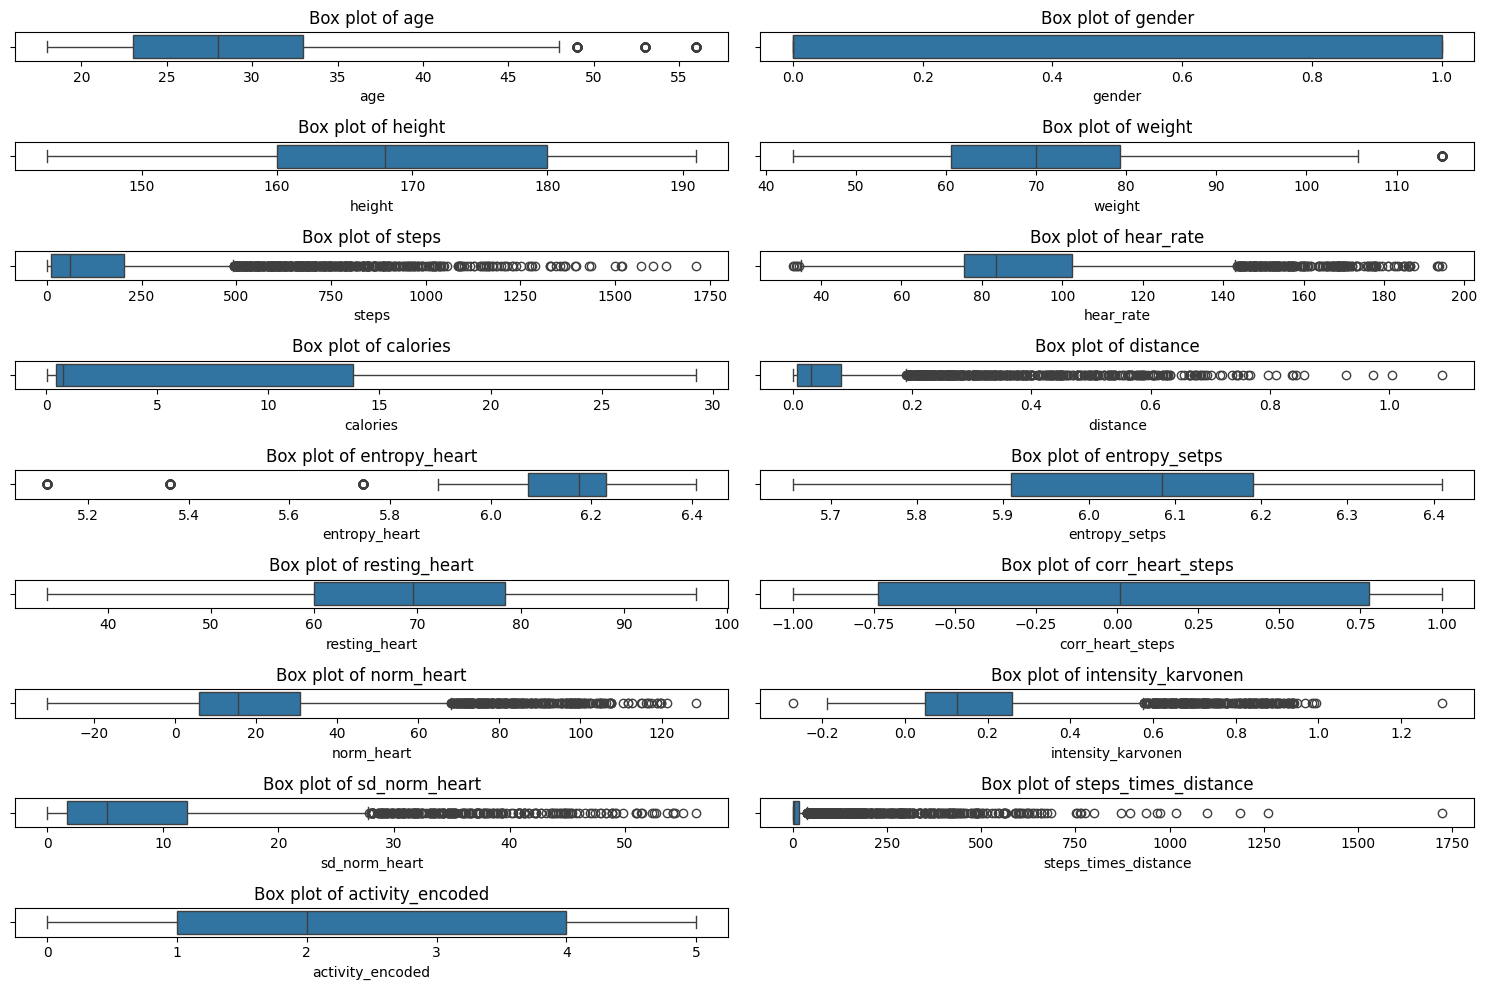

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plotting box plots for all numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 1) // 2, 2, i + 1)
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [9]:
#Before the removal of outliers
print("data set length:", len(data))
print("Data Set shape:", data.shape)

data set length: 3656
Data Set shape: (3656, 18)


In [10]:
def remove_outliers(df, column, multiplier=3):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

variables = ['age', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'resting_heart']

for var in variables:
    data = remove_outliers(data, var, multiplier=3)


In [11]:
#Shape of the data after removal of outliers
print("data set length:", len(data))
print("Data Set shape:", data.shape)

data set length: 3225
Data Set shape: (3225, 18)


In [12]:
#statistical summary
data_without_categorical = data.drop(['gender', 'activity_encoded'], axis=1)
print(data_without_categorical.describe())

               age       height       weight        steps    hear_rate  \
count  3225.000000  3225.000000  3225.000000  3225.000000  3225.000000   
mean     29.426357   169.778605    70.356837   106.256357    90.442142   
std       9.176055    10.500702    13.451103   152.707627    25.733375   
min      18.000000   143.000000    43.000000     1.000000    33.000000   
25%      23.000000   160.000000    60.500000     9.964912    75.500000   
50%      28.000000   168.000000    70.000000    33.980000    83.090909   
75%      33.000000   180.000000    79.300000   128.000000   101.285714   
max      56.000000   191.000000   115.000000   776.700000   179.416667   

          calories     distance  entropy_heart  entropy_setps  resting_heart  \
count  3225.000000  3225.000000    3225.000000    3225.000000    3225.000000   
mean      5.943372     0.048383       6.132058       6.058488      68.174994   
std       7.335408     0.061408       0.204812       0.177452      12.171463   
min       0.0

In [13]:
#Frequency Counts for Categorical Variables:

print(data['gender'].value_counts())
print(data['activity_encoded'].value_counts())

gender
0    1677
1    1548
Name: count, dtype: int64
activity_encoded
0    716
4    536
3    521
5    494
2    488
1    470
Name: count, dtype: int64


In [17]:
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Goal 1: Testing the Effect of Gender on Intensity Karvonen

# Perform t-test to compare intensity Karvonen between different gender groups
male_intensity = data[data['gender'] == 1]['intensity_karvonen']
female_intensity = data[data['gender'] == 0]['intensity_karvonen']
t_stat, p_value = ttest_ind(male_intensity, female_intensity)
print("T-test results for gender effect on intensity Karvonen:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Fit linear model to test gender effect
model = ols('intensity_karvonen ~ gender', data=data).fit()
print(model.summary())

T-test results for gender effect on intensity Karvonen:
T-statistic: -8.141326241845535
P-value: 5.527530844175939e-16
                            OLS Regression Results                            
Dep. Variable:     intensity_karvonen   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     66.28
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           5.53e-16
Time:                        14:16:57   Log-Likelihood:                 684.88
No. Observations:                3225   AIC:                            -1366.
Df Residuals:                    3223   BIC:                            -1354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

In [20]:
# Goal 2: Comparing Mean Intensity Karvonen Across Different Levels of Activities

# Perform ANOVA to compare intensity Karvonen across activity levels
activity_groups = [data[data['activity_encoded'] == activity]['intensity_karvonen'] for activity in data['activity_encoded'].unique()]
f_stat, p_value = f_oneway(*activity_groups)
print("\nANOVA results for activity effect on intensity Karvonen:")
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Fit linear model to test activity effect
activity_model = ols('intensity_karvonen ~ activity_encoded', data=data).fit()
print(activity_model.summary())



ANOVA results for activity effect on intensity Karvonen:
F-statistic: 190.68368712427983
P-value: 2.450602213019586e-178
                            OLS Regression Results                            
Dep. Variable:     intensity_karvonen   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     738.0
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.59e-146
Time:                        14:22:24   Log-Likelihood:                 984.55
No. Observations:                3225   AIC:                            -1965.
Df Residuals:                    3223   BIC:                            -1953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---

In [21]:
#Feature engineering.
# I am creating a new feature BMI

data['height_m'] = data['height'] / 100

# Calculating BMI
data['BMI'] = data['weight'] / (data['height_m'] ** 2)
data.drop(columns=['height_m'], inplace=True)

#First few rows of the updated dataset
print(data.head())

   age  gender  height  weight      steps  hear_rate   calories  distance  \
0   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
1   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
2   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
3   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
4   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  entropy_setps  resting_heart  corr_heart_steps  norm_heart  \
0       6.221612       6.116349           59.0          1.000000   19.531302   
1       6.221612       6.116349           59.0          1.000000   19.453390   
2       6.221612       6.116349           59.0          1.000000   19.540825   
3       6.221612       6.116349           59.0          1.000000   19.628260   
4       6.221612       6.116349           59.0          0.982816   19.715695   

   intensity_karvonen  sd_norm_heart  steps_times_distan

In [22]:
#Feature selection
selected_features = ['age', 'BMI', 'hear_rate', 'resting_heart']
selected_data = data[selected_features]

#First few rows of the selected dataset
print(selected_data.head())

   age        BMI  hear_rate  resting_heart
0   20  23.171769  78.531302           59.0
1   20  23.171769  78.453390           59.0
2   20  23.171769  78.540825           59.0
3   20  23.171769  78.628260           59.0
4   20  23.171769  78.715695           59.0


In [23]:
#Data Standardization
from sklearn.preprocessing import StandardScaler

# Selecting the features for standardization
features = ['age', 'BMI', 'hear_rate', 'resting_heart']
target_variable = 'intensity_karvonen'

# Standardization
scaler_standard = StandardScaler()
data_standardized = data.copy()  # Make a copy of the original data
data_standardized[features + [target_variable]] = scaler_standard.fit_transform(data_standardized[features + [target_variable]])

In [24]:
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into features (X) and target variable (y)
X = data_standardized[features]
y = data_standardized[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

linear_reg_model = LinearRegression()

#Cross-validation
cv_scores = cross_val_score(linear_reg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-Validation MSE:", -cv_scores.mean())

# TrainING the model
linear_reg_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = linear_reg_model.predict(X_train)

# Predictions on the test set
y_test_pred = linear_reg_model.predict(X_test)

# Calculating R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calculating Root Mean Squared Error (RMSE)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Cross-Validation MSE: 0.015273911251235695
Train R-squared: 0.9851053315132463
Test R-squared: 0.9872576346815637
Train MAE: 0.0749636527154777
Test MAE: 0.06776372774269156
Train RMSE: 0.12332051038031655
Test RMSE: 0.10800542009254281


In [28]:
# Model 2 Rnadon Forest

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE:", -cv_scores_rf.mean())

#Training the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculating R-squared
train_r2_rf = rf_model.score(X_train, y_train)
test_r2_rf = rf_model.score(X_test, y_test)

# Calculating MAE
train_mae_rf = mean_absolute_error(y_train, rf_model.predict(X_train))
test_mae_rf = mean_absolute_error(y_test, rf_predictions)

# Calculating RMSE
train_rmse_rf = mean_squared_error(y_train, rf_model.predict(X_train), squared=False)
test_rmse_rf = mean_squared_error(y_test, rf_predictions, squared=False)

print("Train R-squared:", train_r2_rf)
print("Test R-squared:", test_r2_rf)
print("Train MAE:", train_mae_rf)
print("Test MAE:", test_mae_rf)
print("Train RMSE:", train_rmse_rf)
print("Test RMSE:", test_rmse_rf)

Cross-Validation MSE: 0.002277456698079426
Train R-squared: 0.9997475887810708
Test R-squared: 0.9985546084300612
Train MAE: 0.007872052222675811
Test MAE: 0.018505427960140087
Train RMSE: 0.0160536658747679
Test RMSE: 0.036375861127272556
